# Decoding the Relationships between Genes

### Minerva University

### Auther: Rwan Khalifa

### Prof. Ribeiro

### December 13, 2023

------
------

## Introduction

In this report I provide the implementation of the longest common subsequence problem in decoding the relationships between gene sequences. The goal is to recover the genealogy tree for a given set of strings represeting the gene sequences including the parent gene and the resulting genes from the replication of that gene and its children. [1]



--------------------
[1] I have structured the report based on the questions prompt where part 1 corresponds to question 1 and so on. 



# Instructions

Let `set_strings` refer to the set of strings created with the gene-sequencing generation program.

In [1]:
#define the set_strings list to be a list of the tuples
#The tuples correspond to each the DNA sequence and a given lowercase letter label
        
set_strings = [('a',
'GCCTCCGTTCATGACGTGTGTATTTTATTCCGAGCAGGATTCAATCGGACATCCAGTTCTGCTACATTCCT\
AGCTAATGAAGAAACTAGACAGCGTCATAGTCTCTATTCTCATAGTGAATAAC'),
('b',
'GACCTCGTCAGCTTCAGTTTATCCAGCAGAATTCAGATGTCATAGTTCGTATCATTCCTGCAAAGAGTACTAGAAGCGTCATAGTCT\
TTTCTAATAGTAC'),
('c',
'GTCCCTCGTCAAGACGTTTCTATTTTATTCCAGCAGGATTCAATCGGCATCAGTTCTGTACATTCCTGCAAAGAAGTAC\
TAGACAGCGTCATAGTCTCTATCTAACTAATTAA'),
('d',
'ACCTCTCACTAAGTTTCATCAGGACGAGAGAATAAAGACTTCACGTTTCAGTAGCACTTCCTGGCCCA\
CACGAGGTACCTAGCAAGCGGTATATAGTCTTTTTTTAGATAGGGAT'),
('e',
'GTCCTCTGTCAAAGATGTATTACTGTTTTGCACAGGAATTCAACGGGCATTCAGTTTTGTACATTAC\
TCGCAAAGACAGTTACTAGACCAACGTCATAAGTCTCTACAAACTAATTAA'),
('f',
'ACCTCTCACTGCAGTTTATCAGGACGAGAGAATAAGATGTCATGTTTCAGTATCATTCCTGCCAC\
ACGAGTACTAGAAGCGGTATATAGTCTTTTTCTAGATAGGAT'),
('g',
'ACGTCATCACCTCCAGATTTATCTAGGCACGCGAGAATAAGATGTACATGATTTACAGTAACATTCCTG\
CCACACAGTTAGAAGTGATATAGTCTGTCTTCTTAGATCAGGAT')]

--------
### Part 1:

Below, I provide an implementation for the longest common subsequence problem. Given any two arbitrary strings, the function `longest_common_subsequence(x, y)` returns all of the Longest Common Subsequences (LCSs) for those two strings and their corresponding lengths. I have included several test cases to ensure the implementation is correct regardless of the nature of the input. 


In [2]:
def longest_common_subsequence(x, y):
    """
    Gives the length of the longest common substring between strings x and y.

    Args:
    - x, y: strings

    Returns:
    - (all_lcs, lcs_length): tuple ([LCS1, LCS2, ...], len(LCS1))
              Tuple of a list of all the possible LCS and the corresponding length (size).
    """

    def build_lcs_table(x, y):
        """
        Builds the LCS table for strings x and y.

        Args:
        - x, y: strings

        Returns:
        - table: list of lists of ints
                 2D table containing the length of LCS for substrings of x and y
        """
        
        # Get the lengths of strings x and y
        m, n = len(x), len(y)
        
        # Initialize the LCS table with zeros
        table = [[0] * (n + 1) for _ in range(m + 1)]

        # Fill in the table using dynamic programming
        for i in range(1, m + 1):
            for j in range(1, n + 1):
                if x[i - 1] == y[j - 1]:
                    table[i][j] = table[i - 1][j - 1] + 1
                else:
                    table[i][j] = max(table[i - 1][j], table[i][j - 1])

        return table

    def reconstruct_lcs(table, x, y, i, j):
        """
        Reconstructs all LCS for strings x and y using the LCS table.

        Args:
        - table: list of lists of ints
                LCS table
        - x, y: strings
                Input strings
        - i, j: int
                Current indices in the LCS table

        Returns:
        - lcs_list: list of strings
                    List containing all possible LCS
        """
        
        # Base case: reached the end of one of the strings
        if i == 0 or j == 0:
            return ['']

        # If characters match, continue backtracking diagonally
        if x[i - 1] == y[j - 1]:
            lcs_list = [seq + x[i - 1] for seq in reconstruct_lcs(table, x, y, i - 1, j - 1)]
        else:
            lcs_list = []
            
            # If the value above is greater, move up
            if table[i - 1][j] >= table[i][j - 1]:
                lcs_list.extend(reconstruct_lcs(table, x, y, i - 1, j))
                
            # If the value on the left is greater, move left
            if table[i][j - 1] >= table[i - 1][j]:
                lcs_list.extend(reconstruct_lcs(table, x, y, i, j - 1))

        return lcs_list

    # Build the LCS table
    lcs_table = build_lcs_table(x, y)
    
    m = len(x)
    n = len(y)

    if m == 0 or n == 0:
        return None, 0

    # Backtrack to generate all LCS
    all_lcs = reconstruct_lcs(lcs_table, x, y, m, n)

    # Remove duplicates and empty strings
    all_lcs = list(set(all_lcs))
    all_lcs = [s for s in all_lcs if s]

    lcs_length = len(all_lcs[0]) if all_lcs else 0

    return (all_lcs, lcs_length)



# Test cases
x1, y1 = 'ABCBDAB', 'BDCABA'
x2, y2 = 'abc', ''
x3, y3 = 'abc', 'a'
x4, y4 = 'abc', 'ac'
x5, y5 = 'hike', 'ojjihk'
x6, y6 = 'I will miss prof. Ribeiro', 'I enjoy problem solving'

# Adjusted assertion to account for different combinations of the output
#instead of sorting, I can use different combinations (3P3 = 6)
assert sorted(longest_common_subsequence(x1, y1)[0]) == sorted(['BDAB', 'BCBA', 'BCAB'])
assert longest_common_subsequence(x1, y1)[1] == 4

#handles empty strings
assert longest_common_subsequence(x2, y2) == (None, 0)
assert longest_common_subsequence(x3, y3) == (['a'], 1)
assert longest_common_subsequence(x4, y4) == (['ac'], 2)

#adjusted assertion to account for different combinations
assert longest_common_subsequence(x5, y5) == (['hk', 'ik'], 2)\
or longest_common_subsequence(x5, y5) == (['ik', 'hk'], 2)

assert longest_common_subsequence(x6, y6) == (['I  probeo', 'I  probei'], 9)\
or longest_common_subsequence(x6, y6) == (['I  probei', 'I  probeo'], 9)


# Print the tuple for illustration purposes
print(longest_common_subsequence(x1, y1))
print(longest_common_subsequence(x2, y2))
print(longest_common_subsequence(x3, y3))
print(longest_common_subsequence(x4, y4))
print(longest_common_subsequence(x5, y5))
print(longest_common_subsequence(x6, y6))



(['BCBA', 'BCAB', 'BDAB'], 4)
(None, 0)
(['a'], 1)
(['ac'], 2)
(['hk', 'ik'], 2)
(['I  probei', 'I  probeo'], 9)


**Dynamic Programming**
The algorithm implements dynamic programming through memoization, where a table is filled in a bottom-up manner, starting from the smallest subproblems and progressing to the larger problem. Dynamic programming can be applied to this problem because it exhibits both the overlapping subproblem property and the optimal substructure property.

**Overlapping Subproblem Property:**
When finding the LCS of two substrings, the same subproblems (smaller sub-sequences) are encountered multiple times. For example, when comparing the substrings "ABCD" and "AED", the problem of finding the LCS of "BCD" and "ED" is repeated, indicating that the solution to the problem can be expressed in terms of solutions to similar subproblems. Dynamic programming solves each subproblem only once and stores its solution, as in how `build_lcs_table` function stores the length of LCS to each subproblem. 

**Optimal Substructure Property:**
For the LCS problem, the optimal solution can be constructed from optimal solutions of its subproblems. If we have the LCS of two smaller substrings, we can construct the LCS of the larger strings by appending the common element. This is because the LCS of the larger strings is built by combining the LCS of the smaller substrings (prefixes of the original strings).

As discussed by Cormen et al. (2019), The previous algorithmic strategy is an improved approach to the following strategy (see next code cell) where it eliminates an entire table (b) that store the directions aiding in reconstructing the LCS. Therefore, the algorithm uses the LCS table alone (where the values for LCS all subproblems are stored) to reconstruct the LCS for the original problem. Each `Table[i][j]` entry depends on only three other table entries:`Table[i-1][j-1]` (the element in the north-west direction), `Table[i-1][j]` (the element above), `Table[i][j-1]` (the element to the left). Given the value of Table[i][j], we can determine in `O(1)` time which of these three values was used to compute it without a directions table (b). Thus, we can reconstruct an LCS in O(m+n) time. Eliminating the b tables saves space complexity from `O(m*n)` to `O(min(m, n))` as we aim to keep track of only the current and the previous row or column. This would be especially important when dealing with very large sequences. 		

The difference in both algorithms also arises in the reconstruction of the LCS, where the previous algorithm returns all LCS while the following strategy generates only one of the LCS.

The difference is in `reconstruct_lcs` function where in the first algorithm it generates the lcs and stores it in a list and then appends other potential lcs to that list. However, for the second algorithm, it only considers one path for the LCS which can miss other paths that also inludes the largest length for LCS. 

In [3]:
#adapted from session 24 CS110 - see references
def lcs_tables(x, y):
    """
    Builds the LCS table and directions table for strings x and y.

    Args:
    - x, y: strings

    Returns:
    - c: list of lists of ints
                2D table containing the length of LCS for substrings of x and y
    - b: list of lists of strings 
            representing directions 
    """
    # Calculate the length of the string
    m = len(x)
    n = len(y)
    
    # Create table
    b = []
    c = []
    
    for i in range (m + 1):
        b.append([0] * (n + 1))
        c.append([0] * (n + 1))
    
    # Fill in the tables using dynamic programming
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if x[i-1] == y[j-1]:
                c[i][j] = c[i-1][j-1] + 1
                b[i][j] = 'NW'
            elif c[i-1][j] >= c[i][j-1]:
                c[i][j] = c[i-1][j]
                b[i][j] = 'N'
            else:
                c[i][j] = c[i][j-1]
                b[i][j] = 'W'
    return c, b



def reconstruct_lcs(b, x, i, j):
    """
    Reconstructs an LCS for strings x and y using the LCS table.

    Args:
    - b: list of lists of strings 
            representing directions 
    - x: string
            Input string1 
    - i, j: int
            Current indices in the b table

    Returns:
    - lcs: list of strings
                List containing the elements that make a potential LCS
    """
    
    # Base case: reached the end of one of the strings
    if i == 0 or j == 0:
        return [[""]]
    
    #backtracking the b table to construct LCS
    elif b[i][j] == 'NW':
        lcs = reconstruct_lcs(b, x, i - 1, j - 1)
        return [s + [x[i-1]] for s in lcs]
    else:
        lcs = []
        if b[i][j] == 'N':
            lcs += reconstruct_lcs(b, x, i-1, j)
        if b[i][j] == 'W':
            lcs += reconstruct_lcs(b, x, i, j-1)
        return lcs

def find_lcs(x, y):
    """
    Finds the Longest Common Subsequence (LCS) between two strings.

    Args:
    - x, y: strings
            Input strings for LCS calculation

    Returns:
    - lcs: list of strings
                the elements making the LCS joined as a single string
    - length: int
                Length of the LCS
    """
    m = len(x)
    n = len(y)
    if m == 0 or n == 0:
        return None, 0
    c, b = lcs_tables(x, y)
    
    lcs = reconstruct_lcs(b, x, m, n)
    
    # Remove duplicates and empty strings
    lcs = [''.join(s) for s in lcs if s != [""]]
    lcs = list(set(lcs))
    
    return lcs, len(lcs[0]) if lcs else 0
    
#### testing your code
x1, y1 = 'ambgdec', 'aubyci'

print(find_lcs(x1, y1))

x2, y2 = 'hike', 'ojjihk'
print(find_lcs(x2, y2))

(['abc'], 3)
(['hk'], 2)


--------
### Part 2:

In this part, I created a matrix of the lengths of the LCS for every pair of strings in `set_strings`. The matrix is a 2D numpy array and is stored to a variable named `len_lcs_matrix`. The matrix has a dimention `7 x 7` representing the 7 input strings of DNA sequences.

For every pair of strings, I used them as the inputs given to the `find_lcs` function defined earlier.[2] 

The function generate_lcs_matrix1 return the length of the LCS only. 

Therefore, I generate `n x n` matrix where $n$ corresponds to the number of strings of DNA sequences,
the index at the ith row and the jth column correspond to the lcs of the ith and jth string given in the `set_strings` list above.

--------

[2] *(I couldn't solve why the `longest_common_subsequence` isn't working in the code below as it generated this error
    [... skipping similar frames: longest_common_subsequence.<locals>.reconstruct_lcs at line 64 (3 times), longest_common_subsequence.<locals>.reconstruct_lcs at line 70 (1 times)], I used `find_lcs` instead)*

In [4]:
import numpy as np

def generate_lcs_matrix1(set_strings):
    """
    Generates a matrix containing the lengths of Longest Common Subsequences (LCS)
    between pairs of strings.

    Args:
    - set_strings: list of tuples
                   List of tuples where each tuple contains a label and a DNA sequence.

    Returns:
    - len_lcs_matrix: numpy array
                     Matrix containing the lengths of LCS between pairs of strings.
    """
    
    # Initialize the length LCS matrix with zeros
    num_strings = len(set_strings)
    len_lcs_matrix = np.zeros((num_strings, num_strings), dtype=int)

    # Calculate the length of the LCS for every pair of strings
    for i in range(num_strings):
        for j in range(num_strings):
            _, length = find_lcs(set_strings[i][1], set_strings[j][1])
            len_lcs_matrix[i, j] = length

    return len_lcs_matrix

# Generate the matrix
len_lcs_matrix1 = generate_lcs_matrix1(set_strings)
print("Length LCS Matrix1:")
print(len_lcs_matrix1)

Length LCS Matrix1:
[[124  90 104  82  93  83  80]
 [ 90 100  91  83  82  88  83]
 [104  91 113  81  99  82  80]
 [ 82  83  81 115  80 101  93]
 [ 93  82  99  80 118  80  79]
 [ 83  88  82 101  80 107  96]
 [ 80  83  80  93  79  96 113]]


--------
As we notice, the diagonal line where `i == j` will include values indicating the length of the DNA sequence itself because the LCS for the same 2 input strings is the same string.

Since the 2 dimentions of the matrix correspond to the same set of strings, we had a redundancy in the matrix and we can improve that by only calculating $\frac{n * m}{2}$ number of LCS. where m and n represent the length of the input strings.

--------

In [5]:
import numpy as np

def generate_lcs_matrix2(set_strings):
    """
    Generates a reduced matrix containing the lengths of Longest Common Subsequences (LCS)
    between pairs of strings.

    Args:
    - set_strings: list of tuples
                   List of tuples where each tuple contains a label and a DNA sequence.

    Returns:
    - len_lcs_matrix: numpy array
                     Matrix containing the lengths of LCS between pairs of strings in the lower triangle.
    """
    
    # Initialize the length LCS matrix with zeros
    num_strings = len(set_strings)
    len_lcs_matrix = np.zeros((num_strings, num_strings), dtype=int)

    # Calculate the length of the LCS for every pair of strings
    for i in range(num_strings):
        #account for redundancy by setting the range up to i instead of num_strings
        for j in range(i):
            _, length = find_lcs(set_strings[i][1], set_strings[j][1])
            len_lcs_matrix[i, j] = length

    return len_lcs_matrix

# Generate the matrix
len_lcs_matrix2 = generate_lcs_matrix2(set_strings)
print("Length LCS Matrix2:")
print(len_lcs_matrix2)

Length LCS Matrix2:
[[  0   0   0   0   0   0   0]
 [ 90   0   0   0   0   0   0]
 [104  91   0   0   0   0   0]
 [ 82  83  81   0   0   0   0]
 [ 93  82  99  80   0   0   0]
 [ 83  88  82 101  80   0   0]
 [ 80  83  80  93  79  96   0]]


-------
Note: Regarding the redundancy in the first matrix, such an observation is going to be useful in designing the strategy to obtain the genealogy binary tree as we shall explore later in this report. 

--------

**Defining a metric of similarity**

I aim to use the length of the longest common subsequence (LCS) as a measure of the similarity between the given strings (DNA sequences). 

However, the length of the given seven DNA sequences varies, rendering the absolute length of the LCS misleading.
(Shorter DNA sequences might have shorter LCS even if they had larger similarity compared to other sequences)

Therefore, I use the share of a given LCS contained in the shorter string out of the relevant pair as a metric to measure the similarity between the given pairs.

To define that metric, I divide the LCS length over the minimum length of the given pairs of DNA sequences. I optain the LCS proportions for each DNA pairs and will use that as an unbiased metric of similarity.  

Below: I generate the matrix of those proportions indicating the LCS share between any given strings pair.

In [6]:
import numpy as np


def generate_lcs_proportion_matrix1(set_strings):
    """
    Generates a matrix representing the proportion of the length of the LCS to the length of the shorter string
    for every pair of strings.

    Args:
    - set_strings: List of tuples, where each tuple contains a label and a string.

    Returns:
    - lcs_proportion_matrix: 2D numpy array representing the LCS proportion matrix.
                             
    """
    # Initialize the LCS proportion matrix with zeros
    num_strings = len(set_strings)
    lcs_proportion_matrix = np.zeros((num_strings, num_strings))

    # Calculate the proportion of the length of the LCS of set_strings[i][1] and set_strings[j][1]
    #to the length of the shorter string.
    
    for i in range(num_strings):
        for j in range(i):
            _, length = find_lcs(set_strings[i][1], set_strings[j][1])
            min_length = min(len(set_strings[i][1]), len(set_strings[j][1]))
            lcs_proportion_matrix[i, j] = round(length / min_length, 3)


    return lcs_proportion_matrix

# Generate the matrix
lcs_proportion_matrix1 = generate_lcs_proportion_matrix1(set_strings)
print("LCS Proportion Matrix:")
print(lcs_proportion_matrix1)


LCS Proportion Matrix:
[[0.    0.    0.    0.    0.    0.    0.   ]
 [0.9   0.    0.    0.    0.    0.    0.   ]
 [0.92  0.91  0.    0.    0.    0.    0.   ]
 [0.713 0.83  0.717 0.    0.    0.    0.   ]
 [0.788 0.82  0.876 0.696 0.    0.    0.   ]
 [0.776 0.88  0.766 0.944 0.748 0.    0.   ]
 [0.708 0.83  0.708 0.823 0.699 0.897 0.   ]]


---------
Below: I provide a visualization to the elements in the matrix where darker red color corresponds to longer LCS.
    
--------

In [7]:
import pandas as pd
import matplotlib as plt

# Create a DataFrame from the len_lcs_matrix1
df = pd.DataFrame(lcs_proportion_matrix1)

# Set the row and column labels to be the gene names
gene_names = [name for name, _ in set_strings]
df.columns = gene_names
df.index = gene_names

# Apply a style
styled_df = df.style.background_gradient(cmap=plt.cm.coolwarm)

# Display the styled DataFrame
styled_df

,a,b,c,d,e,f,g
a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
b,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
c,0.920000,0.910000,0.000000,0.000000,0.000000,0.000000,0.000000
d,0.713000,0.830000,0.717000,0.000000,0.000000,0.000000,0.000000
e,0.788000,0.820000,0.876000,0.696000,0.000000,0.000000,0.000000
f,0.776000,0.880000,0.766000,0.944000,0.748000,0.000000,0.000000
g,0.708000,0.830000,0.708000,0.823000,0.699000,0.897000,0.000000


---------
#### Examining the Matrix and general inference about the tree

Before examining the matrix, I aim to discuss 2 assumptions:

1) The parents share the largest similarity to their siblings whether their 1st degree, 2nd degree siblings, and so on.

2) The further down the tree, the further mutations between the siblings and further differences especially between 2nd degree siblings (those sequences that share the same grandparent but not the same parent).

Following the first assumption, I can predict the root of the tree representing the original parent to have the maximum average LCS proportion indicating maximim connection to all DNA sequences.

To determine the 2 children of the root node of the tree, I can invistigate the the next 2 highest mean LCS proportions indicating they would be the children nodes of the root node and will be the parent nodes for the remaining strings.

By examining the table for each string:

I noticed that string b generally has the highest proportions `(0.9, 0.91, 0.83, 0.82, 0.88, 0.83)` with all the other pairs and thus potentially the highest average LCS proportion, making it a great candidate as a root of the tree.

I then take the two strings with the next highest mean LCS proportion aside from `b`.

Both strings `c` and `f` show overall large values:

`c` -> (0.92, 0.91, 0.71, 0.876, 0.766, 0.7)

`f` -> (0.776, 0.88, 0.766, 0.94, 0.748, 0.897)

Therefore, I can predict those strings to be children of the **root node `b`.**

**Parent `b` has two children `c` and `f`**


Since there are no remaining parents in the tree (only 4 leaf nodes left indicating two children for each parent of `c` and `f`), it's plausible to invistigate the LCS proportion for the remaining strings and the parents.

However, I shall ignore `b` in this process as it has been already assigned to 2 child nodes.

1) Taking the two strings with the highest LCS proportion with `c`:

(I shall ignore `f` as it's a sibling for `a`)

`Strings (c, a) -> 0.92`

`Strings (c, e) -> 0.876`

**Thus, Parent `c` has two children `a` and `e`.**

2) I can use the same procedure to get the children of `f` or simply take the remaining 2 strings:

**Thus, Parent `f` has two children `d` and `g`.**


---------

------------
### Part 3: 

After the attempt to infer the relationships between the given DNA sequences, I further explore two strategies that can identify the precise relationships.

I developed a local strategy that infers the location of a particular string in the tree based on a greedy
property (LCS proportion) of the node itself. The strategy attempts to define the nodes by comparing and assigning the nodes step-by-step taking the best decision on the each node level.  

However, such strategy oversights the global solutions that can be better and optiomal solutions. 

Thus, I have also developed a global strategy that infers the whole tree based on a metric obtained by considering all the relationships involved in that tree at once (Total LCS proportions of a tree). This approach benefits from generating the different combinations of the tree and comparing the tree fitness by the metric of the total LCS proportions as we shall discuss later.

-------------

## The Local Strategy 

---------
**The metric**
As indicated while inferring the relationships based on the proportions matrix, the process depends on each string's mean longest common subsequence (LCS) containment share. I will use "LCS proportions" as a shorthand for this metric.  


**The algorithmic strategy**

**Initialization:**

The algorithm takes the proportions matrix and the DNA sequences as input. 

**Execution:**

1) The algorithm starts by choosing the tree's root based on the matric of the mean LCS proportion. 

The mean LCS proportion is calculated by evaluating the average proportion of each string, either by calculating it for each row or for each column, as both dimensions of the matrix correspond to the strings representing the set of 7 DNA sequences. Therefore, I constructed the `lcs_proportion_matrix2` to fill the whole matrix even with redundancies for easier calculation. 

2) The algorithm assigns the string with the maximum mean LCS proportion as the tree's root. This root is never revisited or reassigned to any other location of the tree. 

3) To determine the 2 children of the root node, the same approach is used as both of the children are also parents of the following nodes that will be added, and hence, the algorithm checks the following 2 largest means. 

This indicates that the algorithm makes a greedy choice, taking the optimal solution at each node.

4) To determine the children for each of those parents, the algorithm considers another metric, "the LCS proportion" of that parent and the other strings. 

The 2 strings with the maximum LCS proportions indicate that they are children of that parent. 

**Termination:**

5) The algorithm terminates once every string (DNA sequence) is assigned and it returns the binary tree represented such that each string has at least one corresponding string or at most 2 strings indicating a parent-child relationship. Strings with no corresponding strings are leaf nodes of the binary tree.

**The local solution**

The algorithm employs a greedy approach, leveraging the Greedy Choice Property, where at each step, it makes a locally optimal choice by selecting the string with the maximum mean LCS proportion or, later, by choosing the string with the maximum LCS proportion when assigning parent-child relationships in the tree. 

While making an optimal choice at each step doesn't guarantee a globally optimal solution, the algorithm consistently reaches a locally optimal solution by maximizing the LCS proportion. This ensures that the algorithm makes the best possible decision at each stage, leading to a solution that is near-optimal in the context of the local choices made during the algorithm's execution.

**The output structure**

The output structure, designed as a binary tree, is well-suited for representing the relationships between DNA sequences after replication. Due to the nature of the problem, there is no requirement to traverse the tree to identify a specific node. Moreover, a binary tree does not impose a clear constraint where the left child is smaller and the right child is larger. 

In this context, binary tree allows for a flexible parent-child relationship where each node can have up to two children, providing a structure that aligns with the inherent complexities and variations in DNA sequences after replication.

**The data structure used**

The algorithmic strategy relied on creating 2 priority queues based on a heap, specifically max heap, to find the strings with the highest LCS containment shares efficiently. 
The heap can be represented as a binary tree where each parent node is less than or equal (in a min-heap) or greater than or equal (in the max-heap) to its child node.
The max heap is a suitable data structure in this algorithmic implementation as it maintains the max heap property by heapifying the elements so that the maximum element is at the root of the tree. 

The heap is used in two ways in this algorithm: 
1. To find the root of the tree , which is the string with the highest mean LCS proportion. The priority queue based on the max heap finds the strings with the maximum key (mean LCS proportion) in O(1) time, which is faster than scanning through a list in O(n) time.
2. To find the two children of each node in the tree by heapifying the unassigned strings based on the LCS proportion. Again, the heap allows us to find these two strings in O(1) time, which is faster than scanning through a list in O (n) time. 

Even though there is a cost to heapify the strings in the heap, it's in O(log n) time. 
Therefore, we can say that the heap will be a better data structure than the list as it allows us to find the maximum element in O (1) time, compared to a list taking O(n) time with a cost that is O(log n) time which is still smaller than O(n) to find an element in the list. This makes the algorithm more efficient, especially when the number of strings is large.

----------

NOTE: The code might generate errors if the `generate_lcs_proportion_matrix2` runs multiple times and I couldn't account for this problem however, the code works correct. 

If you encounter such an error, restart the kernel and run this function along the with desired function only.

In [8]:
import numpy as np
import pandas as pd

def generate_lcs_proportion_matrix2(set_strings):
    """
    Generates a matrix representing the proportion of the length of the LCS to the length of the shorter string
    for every pair of strings.

    Args:
    - set_strings: List of tuples, where each tuple contains a label and a string.

    Returns:
    - lcs_proportion_matrix: 2D numpy array representing the LCS proportion matrix.
    
    """
    # Initialize the LCS proportion matrix with zeros
    num_strings = len(set_strings)
    lcs_proportion_matrix = np.zeros((num_strings, num_strings))

    # Calculate the proportion of the length of the LCS to the length of the shorter string for every pair of strings
    for i in range(num_strings):
        for j in range(num_strings):
            _, length = find_lcs(set_strings[i][1], set_strings[j][1])
            min_length = min(len(set_strings[i][1]), len(set_strings[j][1]))
            lcs_proportion_matrix[i, j] = round(length / min_length, 3)


    return lcs_proportion_matrix

# Usage:
lcs_proportion_matrix2 = generate_lcs_proportion_matrix2(set_strings)
print("LCS Proportion Matrix2:")
print(lcs_proportion_matrix2)

LCS Proportion Matrix2:
[[1.    0.9   0.92  0.713 0.788 0.776 0.708]
 [0.9   1.    0.91  0.83  0.82  0.88  0.83 ]
 [0.92  0.91  1.    0.717 0.876 0.766 0.708]
 [0.713 0.83  0.717 1.    0.696 0.944 0.823]
 [0.788 0.82  0.876 0.696 1.    0.748 0.699]
 [0.776 0.88  0.766 0.944 0.748 1.    0.897]
 [0.708 0.83  0.708 0.823 0.699 0.897 1.   ]]


In [9]:
import heapq

def build_tree_heap_all_nodes(lcs_proportion_matrix, set_strings):
    """
    Build a hierarchical tree structure based on the mean LCS-containment share of strings.

    Args:
    - lcs_proportion_matrix (numpy.ndarray): Matrix containing the LCS-containment shares between strings.
    - set_strings (list): List of strings representing the set of DNA sequences.

    Returns:
    dict: Tree representation with parent-child relationships based on mean LCS-containment shares.
    """
    
    num_strings = len(set_strings)
    tree = {i: [] for i in range(num_strings)}  # Initialize tree with all nodes as roots
    assigned = set()  # Keep track of nodes that have been assigned as children

    # Calculate the mean LCS-containment share for each string
    mean_lcs_shares = np.mean(lcs_proportion_matrix, axis=1)

    # Create a heap of all nodes, with the LCS-containment share as the priority
    nodes_heap = [(-mean_lcs_shares[i], i) for i in range(num_strings)]
    heapq.heapify(nodes_heap)

    # The root is the string with the highest mean LCS-containment share
    _, root = heapq.heappop(nodes_heap)
    assigned.add(root)

    # Find the two strings with the highest mean LCS-containment shares
    top_two = [heapq.heappop(nodes_heap) for _ in range(2)]
    for _, child in top_two:
        tree[root].append(child)
        assigned.add(child)

    # Queue of nodes to process
    queue = [child for _, child in top_two]

    while queue:
        parent = queue.pop(0)

        # Find the two unassigned strings with the highest LCS-containment shares with the parent
        lcs_shares = [(-lcs_proportion_matrix[parent, i], i) for i in range(num_strings) if i not in assigned]
        heapq.heapify(lcs_shares)

        for _ in range(2):
            if lcs_shares:
                _, child = heapq.heappop(lcs_shares)
                tree[parent].append(child)
                assigned.add(child)
                queue.append(child)

    return tree


# Usage:
genealogy_tree =  build_tree_heap_all_nodes(lcs_proportion_matrix2, set_strings)
print(genealogy_tree)

{0: [], 1: [5, 2], 2: [0, 4], 3: [], 4: [], 5: [3, 6], 6: []}


--------
## The Global Strategy 

--------
As discussed, the greedy approach, in theory, falls short of guaranteeing a globally optimal solution for constructing the most accurate tree representation of given DNA sequences. Therefore, I developed another approach that is guaranteed to reach the global optimal solution. Instead of making localized decisions (taking the best choice of nodes at each step), I used a brute-force algorithm that exhaustively explores all possible permutations of the nodes’ locations in the tree. At the tree level, the algorithm determines the tree fitness which is a metric to determine the optimal tree configuration. It aggregates relevant information (total LCS proportions) about the relationships between nodes.

For instance, in the case of handling 7 DNA sequences, this algorithm generates and evaluates all possible 7! (7 factorial) trees, comparing their fitness metrics. Although this exhaustive search is computationally expensive, particularly with larger input sizes, it guarantees the identification of the best solution for the given problem. The term 'fitness' encapsulates a measure of how well the tree captures the relationships and similarities among the DNA sequences, offering a comprehensive evaluation of each tree's quality and accuracy in representing the underlying biological relationships."

----------


In [10]:
#global solution
#brute force

import numpy as np
import itertools

def calculate_tree_fitness(tree, lcs_proportion_matrix):
    """
    Calculate the fitness of a tree based on the LCS proportion matrix.

    Args:
    - tree (dict): Tree representation with parent-child relationships.
    - lcs_proportion_matrix (numpy.ndarray): Matrix containing the LCS-containment shares between strings.

    Returns:
    float: Total fitness of the tree.
    """
    total = 0
    for parent, children in tree.items():
        for child in children:
            total += lcs_proportion_matrix[parent][child]
    return total

def generate_tree(permutation):
    """
    Generate a tree representation based on a given permutation of nodes.

    Args:
    - permutation (tuple): Permutation of node indices.

    Returns:
    dict: Tree representation with parent-child relationships.
    """
    tree = {i: [] for i in range(len(permutation))}
    queue = [permutation[0]]
    i = 1
    while queue:
        parent = queue.pop(0)
        if i < len(permutation):
            tree[parent].append(permutation[i])
            queue.append(permutation[i])
            i += 1
        if i < len(permutation):
            tree[parent].append(permutation[i])
            queue.append(permutation[i])
            i += 1
    return tree

def find_optimal_tree(lcs_proportion_matrix):
    """
    Find the optimal tree representation through a brute-force approach.

    Args:
    - lcs_proportion_matrix (numpy.ndarray): Matrix containing the LCS-containment shares between strings.

    Returns:
    dict: Optimal tree representation with parent-child relationships.
    """
    num_strings = len(lcs_proportion_matrix)
    max_fitness = - np.inf
    optimal_tree = None

    for permutation in itertools.permutations(range(num_strings)):
        tree = generate_tree(permutation)
        fitness = calculate_tree_fitness(tree, lcs_proportion_matrix)
        if fitness > max_fitness:
            max_fitness = fitness
            optimal_tree = tree

    return optimal_tree

# Usage:
optimal_tree = find_optimal_tree(lcs_proportion_matrix2)
print("Optimal Tree:")
print(optimal_tree)

Optimal Tree:
{0: [], 1: [2, 5], 2: [0, 4], 3: [], 4: [], 5: [3, 6], 6: []}


-----------
## Tree Representation and discussion

--------
Below is a visual representation of the binary tree where the numbers describe the indicies of the DNA sequences in the `set_strings` list. 

Where 0 represents string `a`,  1 represents string `b`, and so on.

------

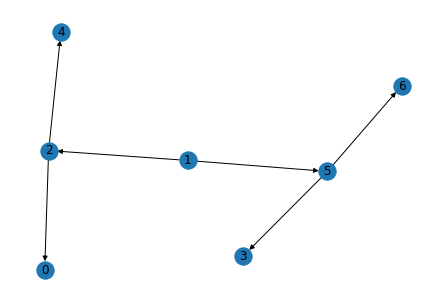

In [11]:
#visualization of the nodes connection in the tree
import networkx as nx
import matplotlib.pyplot as plt

def draw_tree(tree):
    """
    Draw a tree represented as a dictionary of parent-child relationships using NetworkX and Matplotlib.

    Args:
    - tree (dict): Tree representation with parent-child relationships.

    Returns:
    None
    """
    G = nx.DiGraph()
    for parent, children in tree.items():
        for child in children:
            G.add_edge(parent, child)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    plt.show()

# Usage:
draw_tree(genealogy_tree)

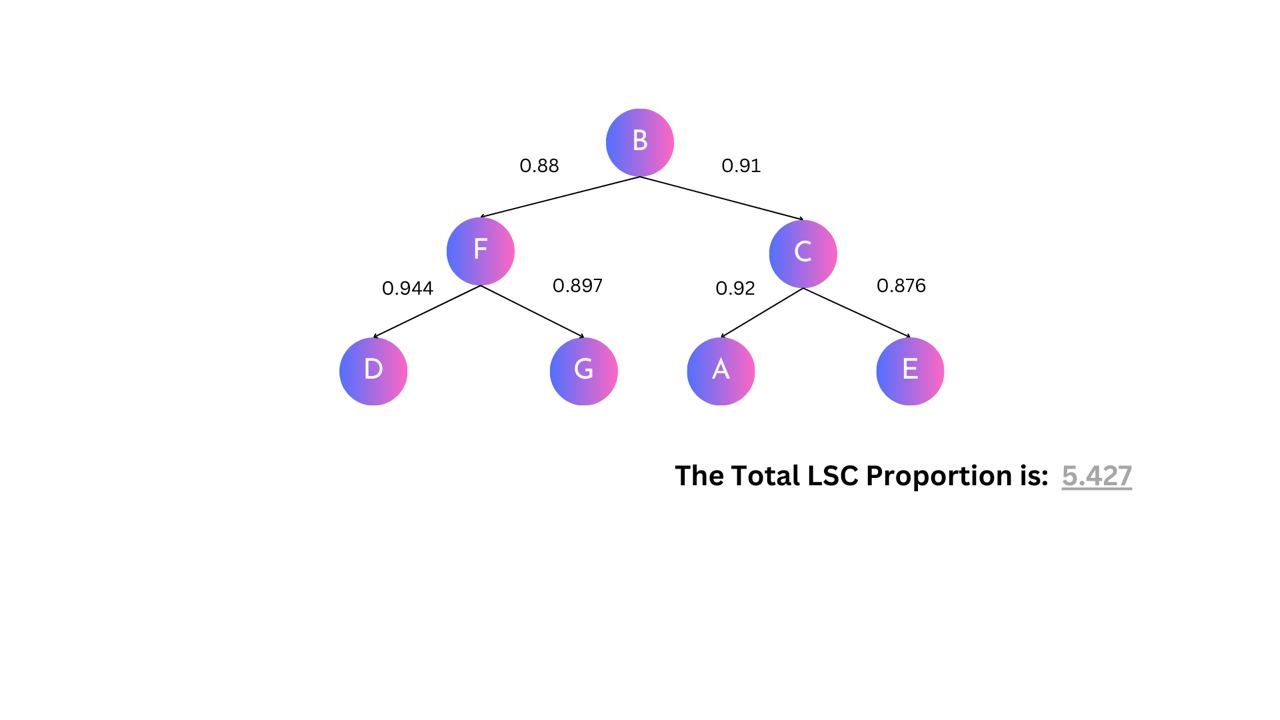

----------
**Comparsion between the strategies:**

The tree generated from both the global and local strategies match. This aligns with the prediction that the local strategy will generate the optimal solution (the most accurate tree representation); however, it's not always guaranteed. 

Since both the strategies' outputs match, this indicates that the local solution was also a global solution with this specific input.

These results align with the inference from the proportions matrix. This is valid since the procedure followed for inferring the relationships in the tree is the same as the local strategy. It's also reasonable to match the global strategy's outcome since such tree representation was in the pool of the 7! possible permutations of the nodes in the tree. 

---------

### Part 4:

**Time complexity Local Strategy**



**Step 1: Calculate LCS-Containment Shares**

1. **Iterate Over Gene Pairs:**
   - For each gene in the pool, there are $(N-1$) other genes to pair it with (as pairs (1, 2) and (2, 1) are considered equivalent). Since we iterate over those genes for $N$ number of times, the time complexity will be  $Θ(N(N-1)) = O(N^2)$

   - **Time Complexity:** $(O(N^2)$)

2. **Longest Common Subsequence (LCS):**
   - The LCS procedure involves a nested loop that iterates over each character of both strings.

   - **Time Complexity:** $(O(M)$) per pair, where $(M$) is the mean length of the genes.

3. **Calculate LCS-Containment Share:**
   - The calculation of the LCS-Containment share is a constant time operation.

   - **Time Complexity:** $(O(1)$)

4. **Store the Result:**
   - The result for each pair is stored.

   - **Time Complexity:** $(O(1)$) per pair

**Total Time Complexity for Step 1:**
   $[
   O(N^2 \cdot M)
   $]

**Step 2: Calculate Mean LCS-Containment Share for Each Gene Pair**

1. **Iterate Over Gene Pairs:**
   - Similar to Step 1, iterating over all pairs.

   - **Time Complexity:** $(O(N^2)$)

2. **Calculate Mean LCS-Containment Share:**
   - For each gene, the mean LCS-Containment share is calculated by summing the shares for all pairs containing it and dividing by the number of pairs.

   - **Time Complexity:** $(O(N^2)$)

**Total Time Complexity for Step 2:**
   $[
   O(N^2)
   $]

**Step 3: Calculate Mean LCS-Containment Share for Each Gene**

1. **Iterate Over Genes:**
   - For each gene, calculate the mean LCS-Containment share with all other genes.

   - **Time Complexity:** $(O(N^2 \cdot M)$)

**Total Time Complexity for Step 3:**
   $[
   O(N^2 \cdot M)
   $]

**Step 4: Build the Tree with Heap Operations**

1. **Initialize Heap:**
   - Create a max heap of nodes based on the mean LCS-Containment share.

   - **Time Complexity:** $(O(N \log N)$)

2. **Build the Tree:**
   - Build the tree by selecting the root and children from the heap.

   - **Time Complexity:** $(O(N^2 \cdot \log N \cdot M)$)

**Total Time Complexity for Step 4:**
   $[
   O(N^2 \cdot \log N \cdot M)
   $]

**Overall Time Complexity:**
   $[
   O(N^2 \cdot M + N^2 \cdot \log N \cdot M)
   $] , the second term dominates representing the upper bound and thus the algorithms overall time complexity is  $[
   O(N^2 \cdot \log N \cdot M)
   $]



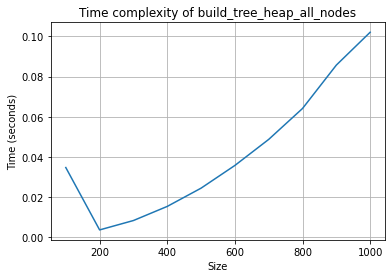

In [12]:
import time
import matplotlib.pyplot as plt

import numpy as np

def generate_random_data(size):
    # Generate a random lcs_proportion_matrix
    lcs_proportion_matrix = np.random.rand(size, size)

    # Generate random set_strings
    set_strings = [''.join(np.random.choice(['A', 'C', 'G', 'T'], size)) for _ in range(size)]

    return lcs_proportion_matrix, set_strings


sizes = range(100, 1001, 100)  # Sizes to test
times = []  # Time taken for each size

for size in sizes:
    lcs_proportion_matrix, set_strings = generate_random_data(size)

    start_time = time.time()
    build_tree_heap_all_nodes(lcs_proportion_matrix, set_strings)
    end_time = time.time()

    times.append(end_time - start_time)

plt.plot(sizes, times)
plt.xlabel('Size')
plt.ylabel('Time (seconds)')
plt.title('Time complexity of build_tree_heap_all_nodes')
plt.grid(True)  # Add grid lines
plt.show()

--------
Based on the observation of single data points in the actual excution time:

Take $n$ as the input size and $t$ as the excution time:

Given the highlighted points below:

$n1 = 400   => t1 = 0.015$

$n2 = 800   => t2 = 0.065$

Therefore, the ratio 

$\frac{n2}{n1} = \frac{800}{400} = 2$

$\frac{t2}{t1} = \frac{0.065}{0.015} = 4.33$

The scaling is not purely quadratic. However, given the general behavior, it's reasonable to describe it as having quadratic scaling because, the execution time roughly quadruples as the input size doubles.

However, observing other data points, 

$n3 = 500   => t3 = 0.05$

$n4 = 1000   => t4 = 0.1$

$\frac{n4}{n3} = \frac{1000}{500} = 2$

$\frac{t4}{t3} = \frac{0.1}{0.05} = 2$

From those two points, the algorithm scales linearly with the input size.

With various data points, it seems impossible to determine the actual time complexity. Moreover, the input size here corresponds to both the size of the DNA sequence and the size of the `set_string` list indicating the number of gene sequences. 

Based on various data points the algorithm scales in a range of quadratic to linear scaling growth. I am assuming that the logarithmic factor in the time complexity is influencing the time complexity indicating $(n^2 log n)$
which falls into the category of "quadratic logarithmic" scaling. 

This can align with the theoritical complexity with $n$ indicating the gene pool size representing the major factor affecting the scaling and $m$ representing the DNA sequence length is insignificant (the length of the DNA sequence can grow up to a certain extent). 

As a conclusion, the scaling growth of the time complexity is dependent on two factors affecting the input size. 

If we assume sequence length to be the same for each iteration, we can analyze the time complexity with respect to increasing the gene pool size and we would observe quadratic logarithmic scaling growth as $O(N^2 \cdot \log N \cdot M)
   $ will converge to $O(N^2 \cdot \log N)$.

Similarly, if we assume the gene pool size is the same and manipulate only the sequence length, we might observe a linear scaling growth since    $O(N^2 \cdot \log N \cdot M)$ will converge to $O(M)$. 

All in all, if the pool size was the close to the genes length $m ~ n$ and both increase with same proportions, the expected scaling would converge to  $O(N^3 \cdot \log N)$ indicating that the running time of an algorithm scales polynomially with the cube of the input size and logarithmically with the input size.

------

--------
**Time Complexity Global Strategy**



Taking $(n$) as the number of strings (genes) in the input and $(m$) as the length of each permutation (length of the gene pool).

1. **Permutation Generation:**
   - The `itertools.permutations` function generates all permutations of the given sequence, and the number of permutations is $(n$) (factorial of $(n$)).
   - Generating each permutation takes $(O(n)$) time.

   **Total Complexity for Permutation Generation:** $(O(n \cdot n!)$)

2. **Tree Generation:**
   - For each permutation, the `generate_tree` function creates a tree representation with parent-child relationships.
   - The function processes each node once, and the time complexity is $(O(m)$) for each permutation.

   **Total Complexity for Tree Generation:** $(O(m \cdot n!)$)

3. **Fitness Calculation:**
   - The `calculate_tree_fitness` function calculates the fitness of a tree by summing up the LCS-containment shares between each parent and child.
   - It iterates over each parent and child in the tree, resulting in a time complexity of $(O(m)$) for each permutation.

   **Total Complexity for Fitness Calculation:** $(O(m \cdot n!)$)

4. **Optimal Tree Search:**
   - The `find_optimal_tree` function iterates through all permutations and calculates the fitness for each tree.
   - The time complexity is dominated by the permutation generation and fitness calculation.

   **Total Complexity for Optimal Tree Search:** $(O(m \cdot n!)$)

By summing up the complexities: $(O(m \cdot n!) + (O(n \cdot n!)) $) it will correspond to $(O(m \cdot n!)$ since $m$ is extensively larger than $n$. This complexity arises due to the exhaustive search through all possible permutations and the associated tree generation and fitness calculation for each permutation. The algorithm's complexity grows factorially with the number of strings, making it computationally expensive for large input sizes.

--------

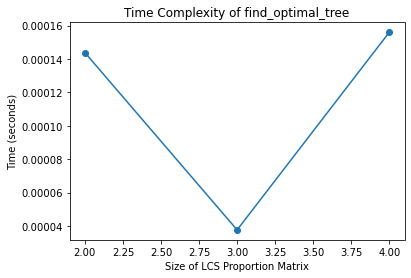

In [16]:
import timeit
import matplotlib.pyplot as plt

def measure_time(lcs_proportion_matrix):
    start_time = timeit.default_timer()
    find_optimal_tree(lcs_proportion_matrix)
    end_time = timeit.default_timer()
    return end_time - start_time

# Generate random LCS proportion matrices of different sizes
sizes = range(2, 5)  # Adjust as needed
lcs_proportion_matrices = [np.random.rand(size, size) for size in sizes]

# Measure the time it takes to find the optimal tree for each LCS proportion matrix
times = [measure_time(lcs_proportion_matrix) for lcs_proportion_matrix in lcs_proportion_matrices]

# Plot the times
plt.plot(sizes, times, marker='o')
plt.title('Time Complexity of find_optimal_tree')
plt.xlabel('Size of LCS Proportion Matrix')
plt.ylabel('Time (seconds)')
plt.show()

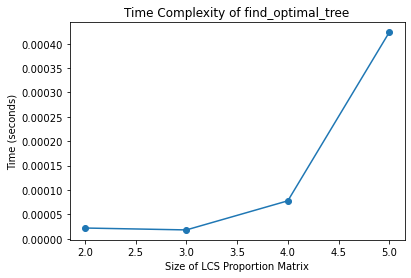

In [14]:
import timeit
import matplotlib.pyplot as plt

def measure_time(lcs_proportion_matrix):
    start_time = timeit.default_timer()
    find_optimal_tree(lcs_proportion_matrix)
    end_time = timeit.default_timer()
    return end_time - start_time

# Generate random LCS proportion matrices of different sizes
sizes = range(2, 6)  # Adjust as needed
lcs_proportion_matrices = [np.random.rand(size, size) for size in sizes]

# Measure the time it takes to find the optimal tree for each LCS proportion matrix
times = [measure_time(lcs_proportion_matrix) for lcs_proportion_matrix in lcs_proportion_matrices]

# Plot the times
plt.plot(sizes, times, marker='o')
plt.title('Time Complexity of find_optimal_tree')
plt.xlabel('Size of LCS Proportion Matrix')
plt.ylabel('Time (seconds)')
plt.show()

Based on both observations on both graphs, there is no need to invistigate the points since duplicating the input size indicates a scaling in factorial term. 


## Algorithms discussion and Recommendation

By comparing both strategies, the greedy approach accounts for a near-optimal solution and in this situation the local solution was the same as the local solution. Therefore, both algorithms succeed at generating the accurate genealogy binary tree for the set of seven DNA sequences. 

The global strategy uses an exhastive brute force approach that is computationally expensive taking $(O(m \cdot n!)$ time in the inputs worst case scenario where the gene pool size is very large. 

The local strategy is better in terms of its computational cost with $O(N^2 \cdot \log N \cdot M)$ time complexity and experimentally scaling near quadratically. 

Therefore, I would recommend utilizing the local strategy as it balances reaching to the most optimal solution and effecient use of resources (time complexity) rendering it a suitable algorithm for such research project on DNQ sequences. 

### Part 5:

Even though the probabilities of insertion, deletion and mutations are anticipated to be small, I developed an algorithmic strategy based on Dynamic programming to calculate the possible number of insertions, deletions, and mutations and then using each operation count divided by the the parent size to calculate the probability of each of these operations in each parent_child relationship. 

*Probability of Event A = the number of favorable outcomes / the total number of outcomes possible*

I take the average of each of these operations to estimate the overall probability of each of them given the 7 DNA sequences. 



The provided code implements a dynamic programming approach to calculate the edit distance between two words (DNA sequences) that can be harnessed to calculate probabilities of different operations (Insert, Delete, Substitute, Match) in the context of a genealogy tree. 

#### Dynamic Programming for Edit Distance Calculation:

This problem is an extention to the LCS problem and hence supports dynamic programming as it follows the optimal solution and overlapping substructure property as explained earlier.

The overarching goal of this problem is to use dynamic programming to get the least number of operations to get the first input string to match the second input string. To find the least number of operations the dynamic programming table storing the solutions for the subproblems fills the table in a bottom-up manner depending on the path of insersion, deletion and mutation which is a replacement of a character with another character. 

1. **Initialization:** A 2D array (`dp`) is initialized to store edit distances. The cell `(i, j)` in the array represents the edit distance between the prefixes of `word1` and `word2` up to lengths `i` and `j`, respectively.

2. **Dynamic Programming Table Filling:** A nested loop iterates over the lengths of `word1` and `word2`. The edit distance is calculated based on the characters at the corresponding positions in the words. If characters are the same, the value is taken from the diagonal; otherwise, the minimum value from the adjacent cells is selected and incremented by 1.

3. **Backtracking Operations:** After filling the dynamic programming table, a backtracking process is applied to find the specific operations (Insert, Delete, Substitute, Match) that transform one word into the other. The backtracking starts from the bottom-right corner of the table and moves towards the top-left corner.

Backtracking is the main procedure to determine the counts of each operation.


#### Probability calculation 

In the following algorithm, I suggested using the average of the probabilities in each parent-child relationship.

However, a better approach should depend on bayesian updating to iteratively refine the estimates of probabilities as more data becomes available. We can assign initial probabilities as prior beliefs, and as new data (evidence) is obtained, these beliefs are updated to form posterior probabilities. 


1. **Prior Beliefs (Initial Probabilities):**
   - We assign initial probabilities for each operation (Insertion, Deletion, Mutation) based on prior knowledge or assumptions. (very small values say 0.03)

2. **Observations (Data):**
   - Using the dynamic programming, we calculate the counts of each operation for each parent-child relationship based on the DNA sequences.

3. **Bayesian Updating:**
   - We then update the probabilities using Bayes' theorem. The formula for Bayesian updating is as follows:
     \[ P(\text{Hypothesis} | \text{Data}) = \frac{P(\text{Data} | \text{Hypothesis}) \cdot P(\text{Hypothesis})}{P(\text{Data})} \]
   - The hypothesis could be the occurrence of a specific operation (Insertion, Deletion, Mutation), and the data is the observed counts of each operation.

4. **Posterior Probabilities:**
   - The updated probabilities after incorporating the new data are the posterior probabilities and can be the final estimate of the probabilities.

5. **Iteration:**
   - Repeat the process as more data becomes available. Each new set of observations can be used to update the probabilities iteratively.


In [10]:
def get_operations_count(word1, word2):
    m, n = len(word1), len(word2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0:
                dp[i][j] = j
            elif j == 0:
                dp[i][j] = i
            elif word1[i - 1] == word2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = 1 + min(dp[i - 1][j], dp[i][j - 1], dp[i - 1][j - 1])

    # Backtrack to find the operations
    i, j = m, n
    operations_count = {'Insert': 0, 'Delete': 0, 'Substitute': 0, 'Match': 0}

    while i > 0 or j > 0:
        if i > 0 and j > 0 and word1[i - 1] == word2[j - 1]:
            operations_count['Match'] += 1
            i -= 1
            j -= 1
        elif i > 0 and dp[i][j] == 1 + dp[i - 1][j]:
            operations_count['Delete'] += 1
            i -= 1
        elif j > 0 and dp[i][j] == 1 + dp[i][j - 1]:
            operations_count['Insert'] += 1
            j -= 1
        else:
            operations_count['Substitute'] += 1
            i -= 1
            j -= 1

    return operations_count

def get_prob(genealogy_tree, set_strings):   
    # Organize tree parent-child pairs for analysis
    pairs = [(parent, child) for parent in genealogy_tree for child in genealogy_tree[parent]]
    gene_pairs = []
    for pair in pairs:
        gene_pairs.append([set_strings[pair[0]][1], set_strings[pair[1]][1]])

    # Count operations for each parent-child pair
    list_operations = [get_operations_count(parent, child) for parent, child in gene_pairs]

    # Calculate probabilities for each operation based on the parent size
    operation_probabilities = {'Insert': 0, 'Delete': 0, 'Substitute': 0, 'Match': 0}
    for operations_count, (parent, child) in zip(list_operations, gene_pairs):
        parent_size = len(parent)
        for operation, count in operations_count.items():
            operation_probabilities[operation] += count / parent_size

    # Normalize probabilities
    total_operations = sum(operation_probabilities.values())
    for operation in operation_probabilities:
        operation_probabilities[operation] /= total_operations

    return operation_probabilities

# Example usage:
word1 = "horse"
word2 = "ros"
operations_count = get_operations_count(word1, word2)
print("Operations Count:")
for operation, count in operations_count.items():
    print(f"{operation}: {count}")

genealogy_tree = build_tree_heap_all_nodes(lcs_proportion_matrix2, set_strings)
print(genealogy_tree)

operation_probabilities = get_prob(genealogy_tree, set_strings)
print("\nOperation Probabilities:")
for operation, probability in operation_probabilities.items():
    print(f"{operation}: {probability}")


Operations Count:
Insert: 0
Delete: 2
Substitute: 1
Match: 2
{0: [], 1: [5, 2], 2: [0, 4], 3: [], 4: [], 5: [3, 6], 6: []}

Operation Probabilities:
Insert: 0.10280382153678946
Delete: 0.03215948538293467
Substitute: 0.05343577063012615
Match: 0.8116009224501497


Interpretting those probabilites, 

Probability of insertion = 0.1

Probability of deletion = 0.03

Probability of mutation = 0.05 

Referring to the LCS matrix generated earlier, the diagonal line in the matrix represented the actual length of the DNA sequence. String `b` has the shortest length (100) and by the algorithm used to generate the binary tree, it was marked as the grandparent of the tree. 

This confirms our priortity estimations, since the root node has the shortest length compared to the children indicating higher probability of insertion. Those observations along with our estimation would indicate finding longer sequences in the children. The mutation can't be quatified based on the length but based on the LCS and since it was significantly small, it still aligns with the LCS proportions we obtained as most of them has a range from 0.67 to 0.95 indicating strong similarities between strings.

# DONE